# Using the basicrobot 
See the project it.unibo.basicrobot2020

See also https://docs.python.org/3/library/asyncio-task.html#coroutines

pip3 install aioconsole

STARTING ... 
CONNECTED WITH  ('192.168.1.15', 8018)
work STARTS :
readSock  STARTS :
RECEIVED: msg(sonarRobot,event,sonarsupport,none,sonar(7),215)

RECEIVED: msg(sonarRobot,event,sonarsupport,none,sonar(8),216)

RECEIVED: msg(sonarRobot,event,sonarsupport,none,sonar(9),217)

RECEIVED: msg(sonarRobot,event,sonarsupport,none,sonar(8),218)

RECEIVED: msg(sonarRobot,event,sonarsupport,none,sonar(8),219)

RECEIVED: msg(sonarRobot,event,sonarsupport,none,sonar(8),220)

RECEIVED: msg(sonarRobot,event,sonarsupport,none,sonar(7),221)

RECEIVED: msg(sonarRobot,event,sonarsupport,none,sonar(7),222)

RECEIVED: msg(sonarRobot,event,sonarsupport,none,sonar(7),223)

sonarData= ['7', '8', '9', '8', '8', '8', '7', '7', '7']


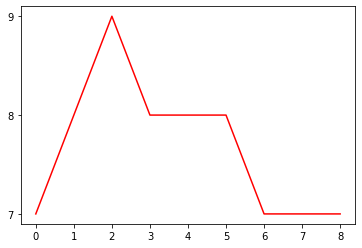

In [4]:
##############################################################
# readSock           : acquires data from input
##############################################################
import socket
import time
import matplotlib.pyplot as plt
import asyncio
#from aioconsole import ainput

robotName      = "basicrobot" # robotadapter | basicrobot

hostAdress     = '192.168.1.15'
basicRobotPort = 8018  
smartRobotPort = 8020  

sonarData      = []

sock          = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

def connect(port) :
    server_address = (hostAdress, port)
    sock.connect(server_address)    
    print("CONNECTED WITH ", server_address)

def terminate() :
    sock.close()    #qak infrastr receives a msg null
    print("BYE")

    
# Define a Python coroutine function        
async  def readSock() :  
    print("readSock  STARTS :"   )
    for i in range(1,10):
        try:
            line = ""
            while not line.endswith('\n'):
                data = sock.recv(1024) # try to receive k bytes
                line = line + data.decode("utf-8") 
            print("RECEIVED:" , line )
            msgitems = line.split(",")
            v = msgitems[4].split('(')[1].split(')')[0]
            sonarData.append( v )
            #print("sonarData=" , sonarData )
        except socket.timeout: # fail after 1 second of no activity
            print("Didn't receive data! ")

#Define a Python coroutine object     
#reader = readSock()
'''
To execute a coroutine object, either:

use it in an expression with await in front of it, or
schedule it with ensure_future() or create_task().

Coroutine objects and future objects are called awaitables - either can be used with await.
'''

#Define a Python coroutine function that excutes the coroutine object reader
#One can only invoke an awaitable once;after that, it’s completed, done, it runs no more.
async def work() :
    print("work STARTS :"   )
    await readSock()
    print("sonarData=" , sonarData )
    plt.plot( list(sonarData), color='red')
    plt.show()
##################################################
print("STARTING ... ")
connect(basicRobotPort)
sock.settimeout(60000)

loop = asyncio.get_event_loop()
'''
A Task is a way to arrange for a coroutine to be executed by an event loop, 
while also providing the caller a way to find out what the result was.
'''
#print("CREATE TASK work ")
futureWorker = asyncio.create_task( work() )


In [3]:
##############################################################
# sendDispatch       : sends a command in output
# read               : acquires data from input
##############################################################
import socket
import time
import matplotlib.pyplot as plt
import asyncio
from aioconsole import ainput

robotName      = "basicrobot" # robotadapter | basicrobot

hostAdress     = '192.168.1.15'
basicRobotPort = 8018  
smartRobotPort = 8020  

sonarData      = []

goForwardMsg  = "msg(cmd,dispatch,python,"+ robotName +",cmd(w),1)"
goBackwardMsg = "msg(cmd,dispatch,python,"+ robotName +",cmd(s),1)" 
turnLeftMsg   = "msg(cmd,dispatch,python,"+ robotName +",cmd(a),1)"  
turnRightMsg  = "msg(cmd,dispatch,python,"+ robotName +",cmd(d),1)"  
haltMsg       = "msg(cmd,dispatch,python,"+ robotName +",cmd(h),1)"

sock          = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

def connect(port) :
    server_address = (hostAdress, port)
    sock.connect(server_address)    
    print("CONNECTED WITH ", server_address)

def terminate() :
    sock.close()    #qak infrastr receives a msg null
    print("BYE")

def forward( message ) :
    print("forward ", message)
    msg = message + "\n"
    byt=msg.encode()    #required in Python3
    sock.send(byt)

def console() :  
    print("console  STARTS :"   )
    cmd =  str( input() )
    print("console  cmd= :" , cmd  )
    while( cmd != "z" ) :
        if( cmd == "w" ) :
            forward( goForwardMsg ) 
        if( cmd == "h" ) :
            forward( haltMsg ) 
        cmd =  str(input())
    
##################################################
print("STARTING ... ")
connect(basicRobotPort)
sock.settimeout(60000)

console() 



STARTING ... 
CONNECTED WITH  ('192.168.1.15', 8018)
console  STARTS :
z
console  cmd= : z


In [ ]:
import asyncio
import aioconsole

something ="something init"

async def echo():
    print( "echo start" )
    stdin, stdout = await aioconsole.get_standard_streams()
    async for line in stdin:
        stdout.write(line)

async def work():
    print( "work startsss" )
    something = str( input() )  
    #something = await aioconsole.ainput('>>>') 
    print( something )

async def test():
    for i in range(2):
        print( "test start" )
        print( something )
        await asyncio.sleep(1)
async def test1():
    for i in range(2):
        print( "test111111111 start" )
        something = await aioconsole.ainput('>>>')   
        print( something )
        await asyncio.sleep(1)
    
loop = asyncio.get_event_loop()
print( "starts ..." )
#loop.create_task( work()  )

#loop.run_until_complete( work() )
t1 = loop.create_task( echo()  )
#t2 = loop.create_task( test1()  )
#await t1
print( "main " , something )
#something = str( input() )
#print( something )